In [83]:
library(survival)
library(survminer)
library(dplyr)
library(arrow)

In [5]:
my_data <- arrow::read_feather("for_surv.feather")
my_data

eid,RF,Prot,Meta,PRS,SomtRF,RF + PRS,RF + PRS + Prot,RF + PRS + Meta,RF + PRS + Prot + Meta,⋯,Prot:zscore:calibrated,Meta:zscore:calibrated,PRS:zscore:calibrated,SomtRF:zscore:calibrated,RF + PRS:zscore:calibrated,RF + PRS + Prot:zscore:calibrated,RF + PRS + Meta:zscore:calibrated,RF + PRS + Prot + Meta:zscore:calibrated,RF + PRS + Prot + Meta + SomaRF:zscore:calibrated,__index_level_0__
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1492817,0.0791677459,0.319106512,0.11183376,1.6316881,0.05609740,0.1029690817,0.135404720,0.113445623,1.377790e-01,⋯,0.05254504,0.05254504,0.052556,0.05138517,0.052556,0.052556,0.052556,0.052556,0.05138517,0
5882986,-0.0948485145,0.148448095,-0.13969530,1.2113180,0.04676773,0.0395244050,0.075449253,0.026902045,6.706113e-02,⋯,0.05254504,0.05254504,0.052556,NA,0.052556,0.052556,0.052556,0.052556,NA,1
4778091,-0.0915487711,0.004251502,-0.08289210,0.8742893,0.03633536,0.0243794752,0.040426822,0.019704443,3.728608e-02,⋯,0.05254504,0.05254504,0.052556,NA,0.052556,0.052556,0.052556,0.052556,NA,2
1815527,-0.1320700608,0.022465672,-0.19025560,0.7922524,0.04729362,0.0103568647,0.035492877,-0.006718550,2.595767e-02,⋯,0.05254504,0.05254504,0.052556,0.05138517,0.052556,0.052556,0.052556,0.052556,0.05138517,3
4712946,0.0131736982,-0.032008007,-0.04054932,1.1662027,0.05033060,0.0644052933,0.058194293,0.057941208,5.547385e-02,⋯,0.05254504,0.05254504,0.052556,NA,0.052556,0.052556,0.052556,0.052556,NA,4
1807640,-0.2269169514,-0.155136698,-0.21371828,0.9409587,0.03390774,-0.0063198817,0.007002583,-0.019659773,9.071868e-05,⋯,0.05254504,0.05254504,0.052556,NA,0.052556,0.052556,0.052556,0.052556,NA,5
4973561,-0.0551011705,-0.243160611,-0.06163101,0.4721466,0.05978561,0.0144400916,-0.008996092,0.010113869,-9.157080e-03,⋯,0.05254504,0.05254504,0.052556,0.05138517,0.052556,0.052556,0.052556,0.052556,0.05138517,6
3148518,-0.2901729133,-0.085725512,-0.09148496,1.1300281,NA,-0.0131824239,0.018931705,-0.004197708,2.128578e-02,⋯,0.05254504,0.05254504,0.052556,NA,0.052556,0.052556,0.052556,0.052556,NA,7
5796059,0.1994190870,0.254383857,0.21876944,NA,NA,NA,NA,NA,NA,⋯,0.05254504,0.05254504,NA,NA,NA,NA,NA,NA,NA,8


In [6]:
my_data =  my_data[1:1000,]
my_data$time <- my_data$future_cad_time_years
my_data$status <- my_data$incident_cad + 1


fit <- survfit(Surv(time, status) ~ sex, data = my_data, )


In [7]:
fit$

[1] 0.9963100 0.9907749 0.9889230 0.9852052 0.9814875 0.9739952 0.9721076
 [8] 0.9683177 0.9644979 0.9625728 0.9625728 0.9606163 0.9585460 0.9585460
[15] 0.9585460 0.9585460 1.0000000 1.0000000 0.9953162 0.9859264 0.9788334
[22] 0.9788334 0.9740234 0.9643316 0.9570076 0.9570076 0.9545089 0.9494452
[29] 0.9417051 0.9417051 0.9373854 0.9373854 0.9373854

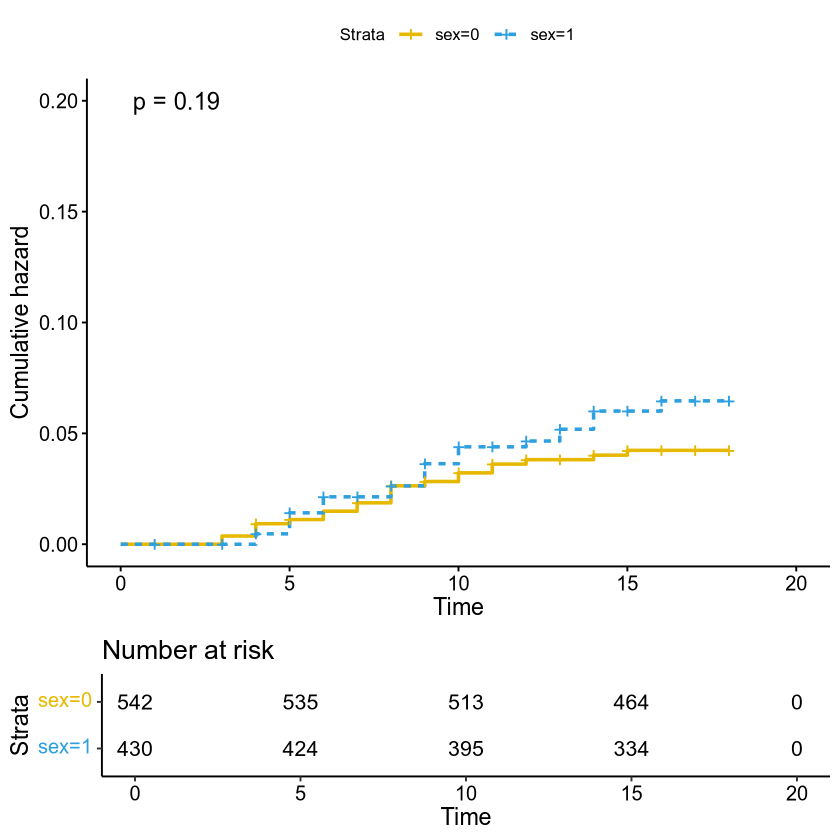

In [6]:
ggsurvplot(fit, data = my_data, risk.table = TRUE, pval = TRUE,
          palette = c("#E7B800", "#2E9FDF"),
          conf.int = F,
          linetype="strata",
          fun="cumhaz"
          )


In [20]:
# cox ph 


# coph for PRS 


Call:
coxph(formula = Surv(time, status) ~ `PRS:zscore` + strata(sex), 
    data = my_data)

  n= 969, number of events= 47 
   (31 observations deleted due to missingness)

               coef exp(coef) se(coef)     z Pr(>|z|)  
`PRS:zscore` 0.2060    1.2288   0.1046 1.971   0.0488 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

             exp(coef) exp(-coef) lower .95 upper .95
`PRS:zscore`     1.229     0.8138     1.001     1.508

Concordance= 0.576  (se = 0.045 )
Likelihood ratio test= 3.92  on 1 df,   p=0.05
Wald test            = 3.88  on 1 df,   p=0.05
Score (logrank) test = 3.9  on 1 df,   p=0.05


In [ ]:
my_data$`RF + PRS + Prot + Meta + SomaRF`

Call:
coxph(formula = as.formula(paste("Surv(time, status)~", xvar)), 
    data = my_data)

  n= 970, number of events= 47 
   (30 observations deleted due to missingness)

      coef exp(coef) se(coef)     z Pr(>|z|)   
PRS 0.9159    2.4989   0.3434 2.667  0.00765 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    exp(coef) exp(-coef) lower .95 upper .95
PRS     2.499     0.4002     1.275     4.898

Concordance= 0.614  (se = 0.041 )
Likelihood ratio test= 6.93  on 1 df,   p=0.008
Wald test            = 7.11  on 1 df,   p=0.008
Score (logrank) test = 7.01  on 1 df,   p=0.008


Warning message in .pvalue(fit, data = data, method = method, pval = pval, pval.coord = pval.coord, :
“There are no survival curves to be compared. 
 This is a null model.”


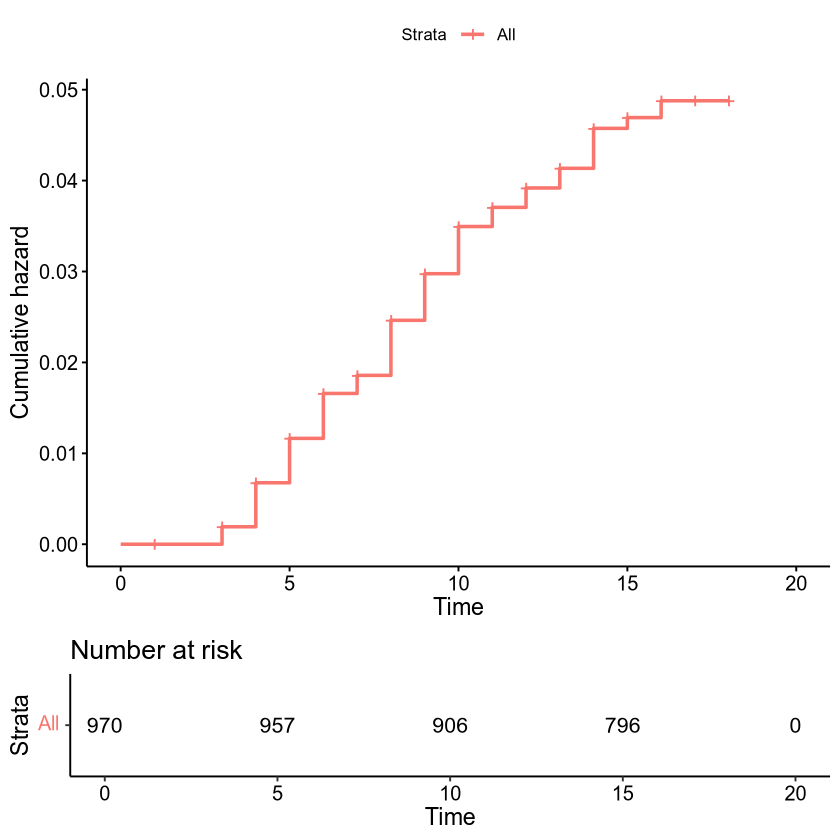

In [89]:
xvar = 'PRS'
fit <- coxph(as.formula(paste('Surv(time, status)~', xvar)), data = my_data)
summary(fit)
ggsurvplot(survfit(fit), data = my_data, risk.table = TRUE, pval = TRUE,
        #   palette = c("#E7B800", "#2E9FDF"),
          conf.int = F,

        #   linetype="strata",
          fun="cumhaz"
          )




Warning message in .pvalue(fit, data = data, method = method, pval = pval, pval.coord = pval.coord, :
“There are no survival curves to be compared. 
 This is a null model.”


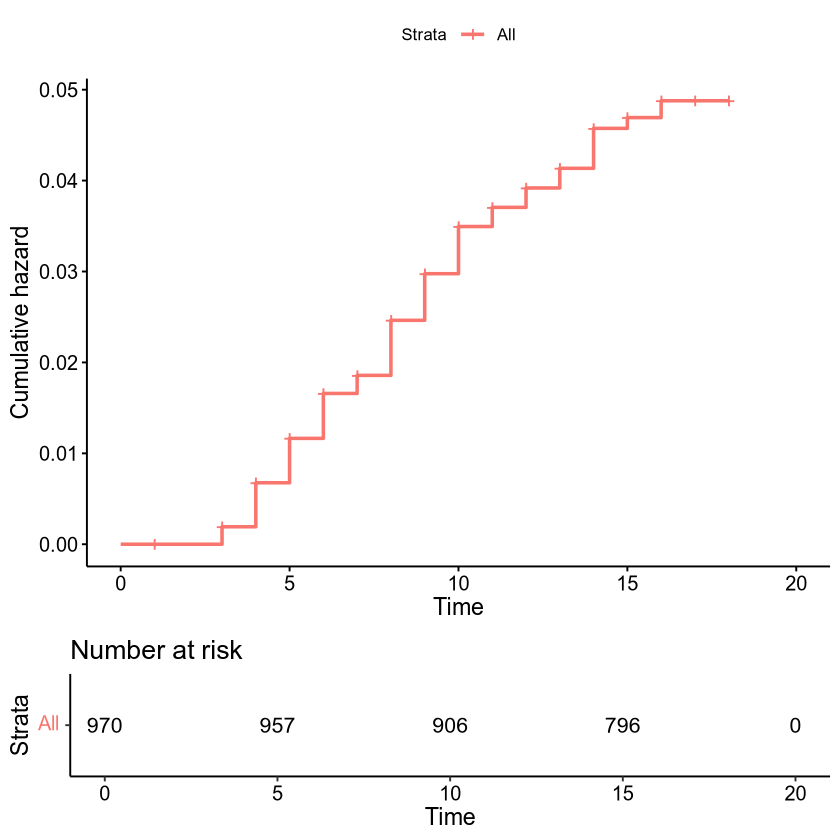

In [71]:
exractr_res <- function(x, round=3){ 
                        x <- summary(fit)
                        p.value<-round(x$wald["pvalue"], round)
                        wald.test<-round(x$wald["test"], round)
                        beta<-round(x$coef[1], round)
                        beta<-round(x$coef[1], round);#coeficient beta
                        HR <-round(x$coef[2], round);#exp(beta)

                        HR_LCI <- round(x$conf.int[,"lower .95"], round)
                        HR_UCI <- round(x$conf.int[,"upper .95"],round)

                        res<-c(beta, HR, HR_LCI, HR_UCI, wald.test, p.value)
                        names(res)<-c("beta", "HR", "HR_LCI", "HR_UCI", "wald.test", 
                            "p.value")
                        t(as.data.frame(res, check.names = FALSE))

                         }

In [72]:

                         
exractr_res(fit, round=6)

,beta,HR,HR_LCI,HR_UCI,wald.test,p.value
res,0.412241,1.510198,1.19872,1.90261,12.24,0.000469


In [17]:
library(forestplot)

ERROR: Error in library(forestplot): there is no package called ‘forestplot’


In [ ]:
forestplot(labeltext=as.matrix(data[,c(1,2,3,4,5,6)]),
           mean=data$HR,
           lower=data$HR_CI_L,
           upper=data$HR_CI_R,
           zero=1,
           boxsize=0.2,
           graph.pos=5, 
           hrzl_lines = list(
             "1" = gpar(lty = 1, lwd = 2),  # Upper line
             "2" = gpar(lty = 2),           # lines first and second row
             "15" = gpar(lwd = 2, lty = 1, columns = c(1:7)) # lower line
           ),
           col=fpColors(box='black'),
           xlab="Hazard Ratio",
           title=t) |>
  fp_set_style(box = "black",
               line = "black",
               summary = "black")


## time ROC

参考：https://www.bioinfo-scrounger.com/archives/Time-dependent-ROC/

In [8]:
library(timeROC)


In [ ]:
lung

In [10]:
library(dplyr)
# drop na 
my_data<- my_data%>%
filter(!is.na(time))


In [14]:
quantile(test$time,probs=seq(0.2,0.8,0.1))

20% 30% 40% 50% 60% 70% 80% 
 15  15  15  16  16  16  17

In [17]:
test$time

[1] 5840 6205 5475 6205 6205 5475 5475 5110 5840 3650 5840 6205 6205 5840
  [15] 6205 5475 5840 5110 5840 5475 5840 5110 6205 5475 4380 5475 5475 4745
  [29] 5475 5475 5475 2920 2555 5840 2555 5840 5840 5840 5840 5840 2920 1460
  [43] 6205 6205 5110 5475 6205 5840 5110 4745 6205 5840 6205 4380 5475 5840
  [57] 5475 5840 5475 5840 5475 5840 5840 5840 5840 6205 5840 5840 6205 5840
  [71] 5475 5840 5110 6205 6205 5475 5475 5840 5840 4380 5840 5840 5475 6205
  [85] 5475 5475 5475 5475 5475 5475 5475 2190 6205 5475 5840 5475 5475 6205
  [99] 2555 5475 5475 6205 6205 5475 2920 5475 5475 4745 5840 5475 6205 5840
 [113] 5840 5840 6205 5110 5840 5840 5475 6205 5840 5475 5840 5110 5840 5475
 [127] 5475 5840 5475 5840 5840 5840 6205 5840 5475 1825 5475 6205 5475 3285
 [141] 5475 5475 5475 5475 6205 6205 5475 5475 5840 6205 3650 5475 5840 4015
 [155] 5475 5110 6205 5840 5110 5475 5840 6205 5475 5475 6205 5475 6205 3285
 [169] 5475 5840 6205 5475 5110 6205 6205 5475 5840 5840 6205 5840 5475  365
 [183] 6205 6205 5475 5840 5475 5840 5840 6205 5840 5840 5840 5840 6205 5840
 [197] 5475 5110 5840 5475 5475 3650 5840 5475 5475 5475 5840 5110 5840 5475
 [211] 5840 5840 5840 5840 5475 6205 5840 4745 4380 5475 5840 5110 6570 6205
 [225] 3650 5475 5840 5840 5475 4745 6205 5110 6205 6205 5475 5840 5840 4745
 [239] 5475 5475 5475 5475 5840 6205 5840 5840 4015 5840 5475 5840 5840 5840
 [253] 6205 5840 2920 5840 5840 5840 6570 5475 5840 2190 5110 5840 5840 3650
 [267] 6205 6205 3650 6205 5110 5840 5475 5475 5110 6205 6205 6205 6205 5840
 [281] 5475 5840 5475 6205 6205 5840 5110 5110 6205 5475 6205 5475 5840 5840
 [295] 6205 5840 6205 5475 6205 5840 5475 5840 5840 5840 5840 5475 6205 5840
 [309] 5475 6205 6205 5475 6205 5475 5475 6205 5840 3285 2920 5840 5110 5840
 [323] 6205 6205 6205 1460 5840 5840 5840 5840 5475 5840 5840 6205 6205 5475
 [337] 5840 5840 5840 5840 5840 2920 5110 5475 5840 1460 5475 5840 5475 5840
 [351] 6205 5110 5840 5110 5475 6205 5840 5110 6205 5475 5475 6205 5475 5840
 [365] 5475 5840 5840 5840 5475 6205 5475 5840 5840 2555 5475 5840 6205 5840
 [379] 5475 5840 1460 5840 5110 6205 5840 5475 6205 5475 5840 5475 5840 6205
 [393] 2190 5840 5840 5475 5840 5475 5475 6205 5110 5475 3650 5475 5475 5475
 [407] 5840 5110 5840 5475 6205 6205 5110 6205 5110 1825 5840 5475 4015 6205
 [421] 1825 5840 6205 6205 4745 6205 5840 5840 2190 6205 5475 5840 5110 5475
 [435] 5840 6205 5840 5840 5475 5840 5840 5475 5475 5840 5840 5475 6205 6205
 [449] 5475 5840 5110 5840 5840 5840 6205 5840 5110 5840 1825 5840 6205 5840
 [463] 3285 1460 6205 5475 5475 5840 5840 5475 5840 5840 5840 2190 4380 5840
 [477] 4380 1460 5840 5475 5840 5475 5475 6205 5840 5840 4380 6205 5475 6205
 [491] 6205 2920 3650 5840 5475 5475 5110 6205 5475 5840 5840 5475 6205 5475
 [505] 1825 5840 6205 5475 2920 5840 6205 5840 6205 5475 6570 5840 5840 6205
 [519] 6205 5840 6205 5475 6205 5110 6205 6205 5840 5475 6205 5840 6205 5475
 [533] 5840 5475 5840 5840 5840 5840 6205 3285 5475 5840 5475 5475 6205 5840
 [547] 5475 4015 5840 6205 5110 5475 5475 5475 5840 5840 6205 6205 5475 5475
 [561] 5475 2190 5840 6205 5840 5475 5840 6205 5840 5475 1825 5840 5110 6205
 [575] 6205 2555 5840 5840 5840 5110 3285 4015 5840 6205 5475 5475 5840 5475
 [589] 5840 5475 5475 6205 5840 6205 1095 5475 5110 6205 5840 6205 5475 5840
 [603] 5110 5840 5475 6205 5840 6205 3650 5475 5840 6205 5475 5475 5110 5475
 [617] 5840 5475 5475 5840 5840 5110 6205 5475 5840 5475 6205 5110 5110 5475
 [631] 5840 5475 5475 5840 2555 6205 5475 5840 6205 5475 5840 5475 5475 5840
 [645] 5840 5840 5840 6205 5475 6205 6205 5475 5840 5110 5475 6205 5475 6205
 [659] 5475 5840 4015 6205 5840 4380 5840 5475 5840 6205 5840 5475 5840 5840
 [673] 5840 6205 2920 5840 3285 5110  365 6205 6205 5840 2555 5110 6205 5840
 [687] 5840 5840 5475 5840 5840 5840 5475 5110 5840 5840 5840 5840 4745 5475
 [701] 5840 5475 5840 5475 6205 5840 5840 5475 5840 5475 6205 5475 5475 5840
 [715] 4745 1460 5110 5475 5840 5840 6205 6205 6205 5840 5110 2555 3285 5475

In [40]:
test <- my_data
# test$time = test$time*365
ROC <- timeROC(
    T = test$time,
    delta <- test$status,
    marker = test$`RF + PRS + Prot + Meta + SomaRF`,
    cause = 2,
    times=c(3, 5, 10),
    iid = F
)
ROC

Time-dependent-Roc curve estimated using IPCW  (n=11231, with competing risks). 
     Cases Survivors Other events Censored AUC_1 (%) AUC_2 (%)
t=3     24     11103           51       53     92.00     91.91
t=5    100     10907          120      104     82.46     82.22
t=10   389     10318          417      107     81.85     81.03

Method used for estimating IPCW:marginal 

Total computation time : 0.01  secs.

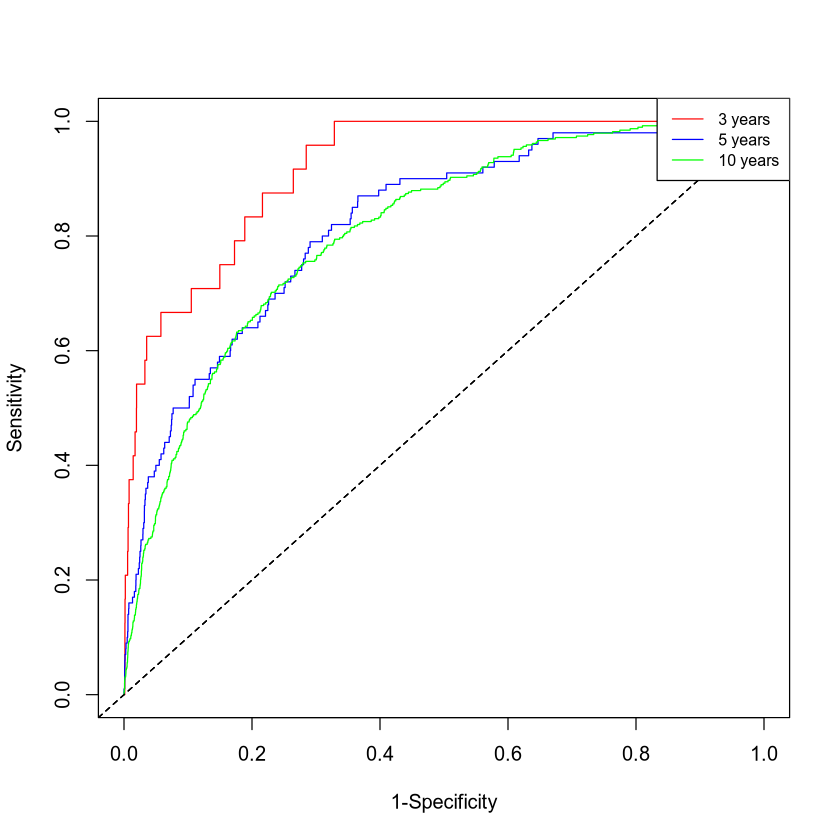

In [47]:
plot(ROC, time = 3, col = "red", title=F)
plot(ROC, time = 5, col = "blue", title=F, add = T)
plot(ROC, time = 10, col = "green", title=F, add = T)  
legend("topright", legend = c("3 years", "5 years", "10 years"), col = c("red", "blue", "green"), lty = 1, cex = 0.8)


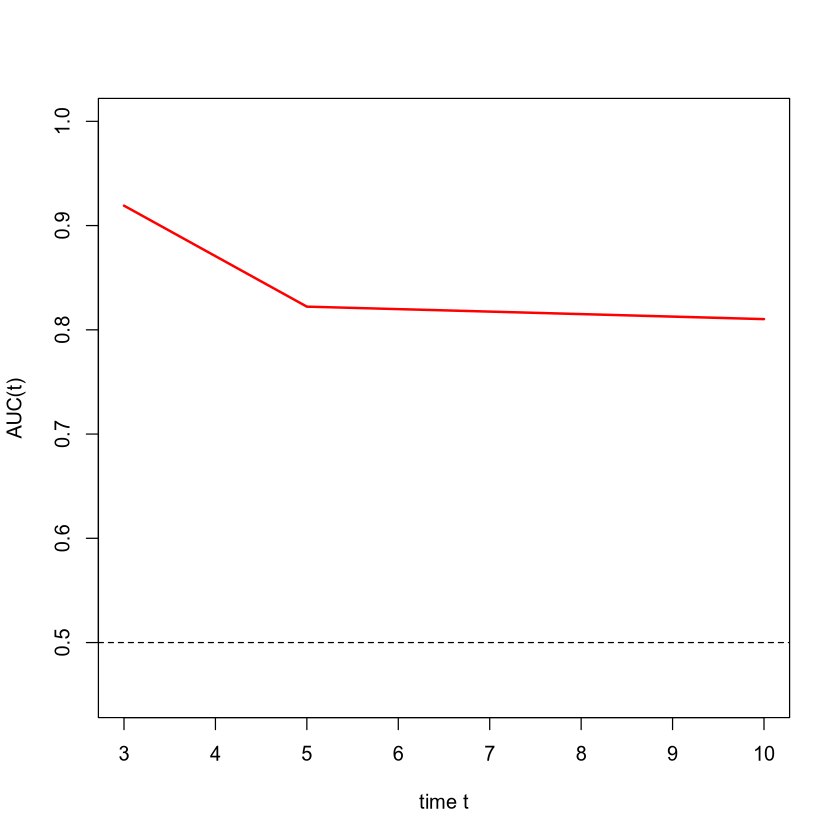

In [49]:
plotAUCcurve(ROC, conf.int=F, col="red")


pROC包

`roc_obj <- roc(true, pred)`即可计算结果

- `ci(roc_obj)` 计算CI

In [30]:
library(pROC)
roc_obj <- roc(test$status, test$`RF + PRS + Prot + Meta + SomaRF`)
roc_obj

Setting levels: control = 1, case = 2

Setting direction: controls < cases




Call:
roc.default(response = test$status, predictor = test$`RF + PRS + Prot + Meta + SomaRF`)

Data: test$`RF + PRS + Prot + Meta + SomaRF` in 10571 controls (test$status 1) < 660 cases (test$status 2).
Area under the curve: 0.8093

In [31]:
ci(roc_obj)

95% CI: 0.7934-0.8252 (DeLong)

In [ ]:
ROC <- timeROC(
    T = lung$time,
    delta <- lung$status,
    marker = lung$age,
    cause = 1,
    times=quantile(lung$time,probs=seq(0.2,0.8,0.1)),
    iid = T
)
ROC

In [15]:
ROC <- timeROC(
    T = pbc$time,
    delta <- pbc$status,
    marker = pbc$bili,
    cause = 1,
    times=quantile(pbc$time,probs=seq(0.2,0.8,0.1)),
    iid = T
)
ROC

Time-dependent-Roc curve estimated using IPCW  (n=418, with competing risks). 
         Cases Survivors Other events Censored AUC_1 (%) se_1 AUC_2 (%) se_2
t=974.8      7       334           72        5     79.84 5.01     72.05 5.17
t=1217.6    10       292           91       25     79.05 6.22     69.63 6.19
t=1730      17       209          112       80     82.02 4.02     67.64 4.21
t=2465      21       126          133      138     81.43 6.19     67.07 5.91
t=2851.8    23        84          143      168     82.57 5.80     66.70 5.45

Method used for estimating IPCW:marginal 

Total computation time : 0.31  secs.

In [ ]:
# ROC <- timeROC(
#     T = my_data$time,
#     delta <- my_data$status,
#     marker = my_data$RF,
#     cause = 2,
#     times=c(1, 3,5),
#     iid = T
# )

## 重分类

In [87]:
library(dplyr)

to_reclass_df <- my_data %>%
  select(
    Patient = eid,
    risk_model1 = RF,
    risk_model2 = `RF + PRS + Prot + Meta + SomaRF`
  ) %>%
  filter(!is.na(risk_model1) & !is.na(risk_model2))
to_reclass_df$risk_model1 <- cut(to_reclass_df$risk_model1, breaks = as.vector(quantile(to_reclass_df$risk_model1,probs=c(0,0.33,0.66, 1))), labels = c("Low", "Medium", "High"))
to_reclass_df$risk_model2 <- cut(to_reclass_df$risk_model2, breaks = as.vector(quantile(to_reclass_df$risk_model2,probs=c(0,0.33,0.66, 1))), labels = c("Low", "Medium", "High"))

to_reclass_df




Patient,risk_model1,risk_model2
<int>,<fct>,<fct>
1492817,High,High
5882986,Low,Medium
4778091,Low,Medium
1815527,Low,Medium
4712946,Medium,Medium
1807640,Low,Low
4973561,Medium,Low
3472763,High,High
4837245,Medium,Medium


In [88]:
# 创建重新分类表
reclass_table <- table(to_reclass_df$risk_model1, to_reclass_df$risk_model2)
# reclass_table <- addmargins(reclass_table)
reclass_table


        
          Low Medium High
  Low    2503   1015  186
  Medium 1048   1749  909
  High    153    942 2724

In [76]:
library(PredictABEL)

library(dplyr)


standardize_func <- function(data, xvar = NULL, means = NULL, sds = NULL,returnALL=F) {
  # 计算每列的均值和标准差
  if (is.null(xvar)) xvar <- colnames(data)
  if (is.null(means)) means <- colMeans(data[, xvar])
  if (is.null(sds)) sds <- apply(data[, xvar], 2, sd)

  means <- means[xvar]
  sds <- sds[xvar]

  data[, xvar] <- data.frame(scale(data[, xvar], center = means, scale = sds))
  if(returnALL){
    return (list(
      data =data,
      mean = means,
      std = sds
    ))
  }else{
    return (data)
  }
}




In [78]:
to_reclass_df

Patient,risk_model1,risk_model2
<int>,<fct>,<fct>
1492817,High,High
5882986,Low,Medium
4778091,Low,Medium
1815527,Low,Medium
4712946,Medium,Medium
1807640,Low,Low
4973561,Medium,Low
3472763,High,High
4837245,Medium,Medium


In [79]:
standardize_func(my_data, xvar = c("risk_model1", "risk_model2"))

ERROR: [1m[33mError[39m in `data[, xvar]`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Columns `risk_model1` and `risk_model2` don't exist.


In [83]:
to_reclass_df <- my_data %>%
  select(
    Patient = eid,
    risk_model1 = RF,
    risk_model2 = `RF + PRS + Prot + Meta + SomaRF`,
    status = incident_cad
  ) %>%
  filter(!is.na(risk_model1) & !is.na(risk_model2))


standardize_func(to_reclass_df, xvar = c("risk_model1", "risk_model2"))

to_reclass_df$risk_model1 <- cut(to_reclass_df$risk_model1, breaks = as.vector(quantile(to_reclass_df$risk_model1,probs=c(0,0.33,0.66, 1))), labels = c("Low", "Medium", "High"))
to_reclass_df$risk_model2 <- cut(to_reclass_df$risk_model2, breaks = as.vector(quantile(to_reclass_df$risk_model2,probs=c(0,0.33,0.66, 1))), labels = c("Low", "Medium", "High"))




Patient,risk_model1,risk_model2,status
<int>,<dbl>,<dbl>,<dbl>
1492817,0.52293091,1.56013221,0
5882986,-0.53637040,0.29813286,0
4778091,-0.51628365,-0.29144981,0
1815527,-0.76295172,-0.43311294,0
4712946,0.12120074,0.05815349,0
1807640,-1.34031981,-0.94246852,0
4973561,-0.29441363,-1.05849589,0
3472763,0.49614060,0.52000490,0
4837245,0.04026983,-0.49124205,0


In [85]:
as.vector(quantile(to_reclass_df$risk_model1,probs=c(0,0.33,0.66, 1)))

ERROR: Error in quantile.default(to_reclass_df$risk_model1, probs = c(0, 0.33, : (unordered) factors are not allowed


In [86]:
reclassification(data=to_reclass_df, 
                 cOutcome=4, 
                 predrisk1=to_reclass_df$risk_model1, 
                 predrisk2=to_reclass_df$risk_model2, 
                 cutoff = c(0, 0.6 ,1))

ERROR: Error in cut.default(predrisk1, breaks = cutoff, include.lowest = TRUE, : 'x' must be numeric


In [75]:
?reclassification

reclassification          package:PredictABEL          R Documentation

_F_u_n_c_t_i_o_n _f_o_r _r_e_c_l_a_s_s_i_f_i_c_a_t_i_o_n _t_a_b_l_e _a_n_d _s_t_a_t_i_s_t_i_c_s.

_D_e_s_c_r_i_p_t_i_o_n:

     The function creates a reclassification table and provides
     statistics.

_U_s_a_g_e:

     reclassification(data, cOutcome, predrisk1, predrisk2, cutoff)
     
_A_r_g_u_m_e_n_t_s:

    data: Data frame or matrix that includes the outcome and predictors
          variables.

cOutcome: Column number of the outcome variable.

predrisk1: Vector of predicted risks of all individuals using initial
          model.

predrisk2: Vector of predicted risks of all individuals using updated
          model.

  cutoff: Cutoff values for risk categories.  Define the cut-off values
          as ‘c(0,...,1)’.  Multiple values can be defined and always
          specify ‘0’ and ‘1’.  Example: ‘c(0,.20,.30,1)’

_D_e_t_a_i_l_s:



In [96]:
 my_data$incident_cad

[1]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 NA  0  0
   [25]  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0 NA  0  0  0
   [49]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   [73]  0  0  0  0  0  0  0  0  0  0 NA  0  0 NA  0  0  0  0  0  0  0  0  0  1
   [97]  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  [121]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  [145]  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0
  [169]  0  0  0  0  0  0  0 NA  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [193]  0  0  0  0  0  0  0  0  0  0  0 NA  0  0  0  1  0  0  0  0  0  0  0  0
  [217]  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
  [241]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [265]  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 NA  0 NA  0
  [289]  0  0 NA  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [313]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1 NA  0 NA  0 NA  0  0  0
  [337]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 NA  0  0  0  0  1  0
  [361]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [385]  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0
  [409]  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
  [433]  0  1  0  0  0  0  0  0  0  0 NA  0  0  0  0  0  0  0  0  0  0  0  0  0
  [457]  0  0  0  0  0 NA  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
  [481]  0  0  0  0 NA  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  [505]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [529]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [553]  0  0  0  1  0  0  0  0  0  0  0  0  0 NA  0  0  0  0  0  0  0  0  0  0
  [577]  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0
  [601]  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0 NA  0
  [625]  0  0  0  0  0  0  0  0  0  0  0  0 NA  0  0  0  0 NA  0  0  0  0  0  0
  [649]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [673]  0  0 NA  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [697]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [721] NA  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [745]  0  0  0  0  1 NA  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [769]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [793]  0  0  0  0  0  0 NA  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  [817]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
  [841]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  [865]  0  0 NA  0  0  0  1  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  [889]  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  [913]  0  0  0  0  0  0  0  0 NA  0  0  0  0  0  0  0  1  1  0  0  0  0  1  0
  [937]  0  0  1  0 NA  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
  [961]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 NA
  [985]  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0 NA  0  0  0  0
 [1009]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [1033]  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
 [1057]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  1  0
 [1081]  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
 [1105]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [1129]  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0 NA  0  1  0 NA  0
 [1153]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
 [1177]  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  1  0  1  0  0  0  0
 [12

,total,meanpred,meanobs,predicted,observed
"[-0.11145,-0.01442)",1124,-0.033,0.002,-36.61,2
"[-0.01442, 0.00519)",1123,-0.004,0.007,-4.37,8
"[ 0.00519, 0.01947)",1123,0.013,0.009,14.13,10
"[ 0.01947, 0.03212)",1123,0.026,0.020,29.02,23
"[ 0.03212, 0.04536)",1123,0.039,0.028,43.50,32
"[ 0.04536, 0.05848)",1123,0.052,0.033,58.05,37
"[ 0.05848, 0.07432)",1123,0.066,0.052,74.10,58
"[ 0.07432, 0.09426)",1123,0.084,0.076,93.98,85
"[ 0.09426, 0.12336)",1123,0.107,0.126,120.69,142
"[ 0.12336, 0.32758]",1123,0.160,0.234,179.27,263


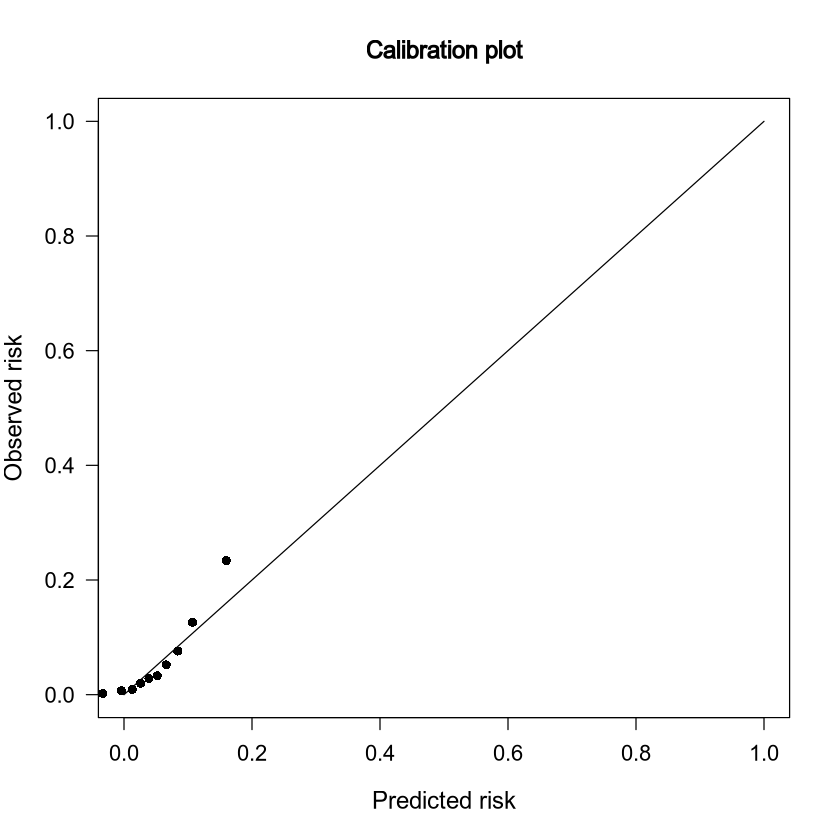

In [100]:
test_data = data.frame(
    RF = my_data$`RF + PRS + Prot + Meta + SomaRF`,
    label = my_data$incident_cad
) %>%
  filter(!is.na(RF) & !is.na(label))
predRisk = test_data$RF
cOutcom = 2 
rangeaxis <- c(0,1)
# specify number of groups for Hosmer-Lemeshow test
groups <- 10
# compute calibration measures and produce calibration plot
plotCalibration(data=test_data, cOutcome=cOutcome, predRisk=predRisk,
groups=groups, rangeaxis=rangeaxis)

In [92]:
predRiskdata(ExampleData)
# specify column number of the outcome variable
cOutcome <- 2
# fit a logistic regression model
# all steps needed to construct a logistic regression model are written in a function
# called 'ExampleModels', which is described on page 4-5
riskmodel <- ExampleModels()$riskModel2
# obtain predicted risks
predRisk <- predRisk(riskmodel)

rangeaxis <- c(0,1)
# specify number of groups for Hosmer-Lemeshow test
groups <- 10
# compute calibration measures and produce calibration plot
plotCalibration(data=ExampleData, cOutcome=cOutcome, predRisk=predRisk,
groups=groups, rangeaxis=rangeaxis)


1           2           3           4           5           6 
0.560721526 0.029775738 0.164065504 0.477143783 0.039672111 0.436540894 
          7           8           9          10          11          12 
0.708257525 0.006602869 0.162840221 0.020827856 0.022603891 0.129891882 
         13          14          15          16          17          18 
0.266384843 0.329566867 0.234918515 0.033326151 0.188919824 0.175002525 
         19          20          21          22          23          24 
0.494802919 0.120918756 0.142986556 0.025538791 0.086927124 0.026015674 
         25          26          27          28          29          30 
0.230554941 0.008331173 0.017762882 0.022518649 0.251405766 0.549255573 
         31          32          33          34          35          36 
0.017930418 0.328132968 0.014945688 0.149149348 0.141752083 0.036213624 
         37          38          39          40          41          42 
0.219722861 0.021632877 0.278337746 0.231637388 0.290814945 0.689315963 
         43          44          45          46          47          48 
0.412470288 0.008570146 0.142907977 0.035137975 0.063349526 0.013817939 
         49          50          51          52          53          54 
0.013855468 0.163213976 0.142294361 0.225687929 0.012305793 0.809997172 
         55          56          57          58          59          60 
0.272880242 0.024950935 0.237026689 0.012246124 0.642100054 0.130638789 
         61          62          63          64          65          66 
0.471170936 0.080383027 0.003733226 0.234072432 0.724330442 0.380668157 
         67          68          69          70          71          72 
0.009307199 0.163690180 0.037241120 0.444341504 0.002614418 0.118864444 
         73          74          75          76          77          78 
0.090411709 0.789345050 0.660261915 0.489374437 0.196427352 0.263258344 
         79          80          81          82          83          84 
0.421089658 0.088658969 0.262321972 0.437020801 0.366068392 0.019318286 
         85          86          87          88          89          90 
0.382893649 0.189673786 0.371629181 0.485281645 0.246106703 0.392163790 
         91          92          93          94          95          96 
0.013885506 0.221051679 0.072327909 0.070589731 0.633042422 0.397846066 
         97          98          99         100         101         102 
0.016421391 0.233767048 0.352290419 0.107751115 0.018341364 0.188552084 
        103         104         105         106         107         108 
0.019285858 0.016205141 0.385466878 0.173587307 0.021031762 0.018037133 
        109         110         111         112         113         114 
0.289718412 0.020138519 0.063224504 0.353365350 0.033884358 0.025359511 
        115         116         117         118         119         120 
0.329590680 0.447046852 0.076313894 0.010081710 0.351906068 0.542116311 
        121         122         123         124         125         126 
0.034671555 0.231617981 0.006501861 0.182914698 0.011301337 0.070998766 
        127         128         129         130         131         132 
0.019821780 0.165902227 0.410277268 0.261829816 0.205178614 0.089390957 
        133         134         135         136         137         138 
0.065443896 0.013658930 0.564399961 0.209377171 0.201327545 0.003856527 
        139         140         141         142         143         144 
0.033298300 0.152559000 0.249406758 0.204725427 0.291361549 0.077935974 
        145         146         147         148         149         150 
0.442802660 0.064662959 0.237031445 0.171360676 0.301441684 0.060312839 
        151         152         153         154         155         156 
0.111181344 0.005756863 0.070192833 0.337855719 0.059321891 0.086571735 
        157         158         159         160         161         162 
0.022718236 0.277009787 0.066922879 0.020576500 0.251088044 0.227787325 
        163         164         165         166         167         

,total,meanpred,meanobs,predicted,observed
"[0.0013,0.0163)",1001,0.010,0.013,10.28,13
"[0.0163,0.0310)",1001,0.023,0.020,22.99,20
"[0.0310,0.0620)",998,0.045,0.046,44.42,46
"[0.0620,0.1115)",1001,0.086,0.091,85.67,91
"[0.1115,0.1608)",1001,0.136,0.120,135.68,120
"[0.1608,0.2130)",1000,0.186,0.185,185.90,185
"[0.2130,0.2721)",999,0.241,0.240,240.78,240
"[0.2721,0.3432)",1000,0.306,0.309,306.31,309
"[0.3432,0.4506)",999,0.390,0.409,389.18,409
"[0.4506,0.8742]",1000,0.566,0.554,565.79,554


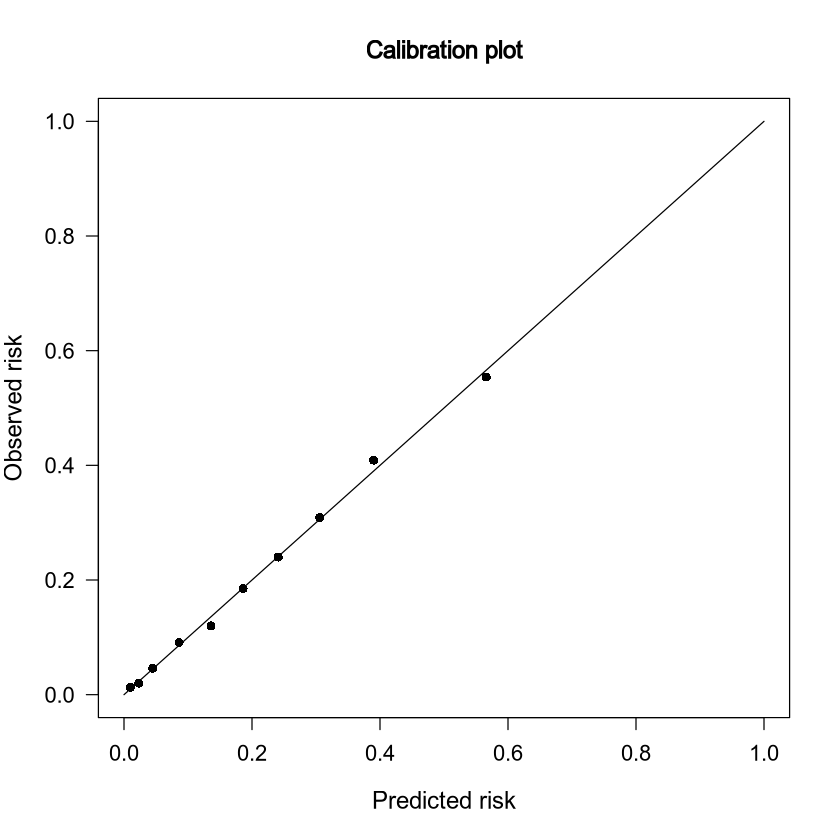

In [90]:
data(ExampleData)
# specify column number of the outcome variable
cOutcome <- 2
# fit a logistic regression model
# all steps needed to construct a logistic regression model are written in a function
# called 'ExampleModels', which is described on page 4-5
riskmodel <- ExampleModels()$riskModel2
# obtain predicted risks
predRisk <- predRisk(riskmodel)

rangeaxis <- c(0,1)
# specify number of groups for Hosmer-Lemeshow test
groups <- 10
# compute calibration measures and produce calibration plot
plotCalibration(data=ExampleData, cOutcome=cOutcome, predRisk=predRisk,
groups=groups, rangeaxis=rangeaxis)


## 决策曲线绘制


In [72]:
library(rmda)
baseline.model <- decision_curve(incident_cad ~ `RF + PRS + Prot`, data = my_data, thresholds= seq(0, .4, by = .01),   bootstraps = 10)
full.model <- decision_curve(incident_cad ~ `RF + PRS + Prot + Meta + SomaRF`, data = my_data, thresholds= seq(0, .4, by = .01),   bootstraps = 10)

Warning message in decision_curve(incident_cad ~ `RF + PRS + Prot`, data = my_data, :
“509 observation(s) with missing data removed”
Note:  The data provided is used to both fit a prediction model and to estimate the respective decision curve. This may cause bias in decision curve estimates leading to over-confidence in model performance. 

Warning message in decision_curve(incident_cad ~ `RF + PRS + Prot + Meta + SomaRF`, :
“3208 observation(s) with missing data removed”
Note:  The data provided is used to both fit a prediction model and to estimate the respective decision curve. This may cause bias in decision curve estimates leading to over-confidence in model performance. 



Note: When multiple decision curves are plotted, decision curves for 'All' are calculated using the prevalence from the first DecisionCurve object in the list provided.



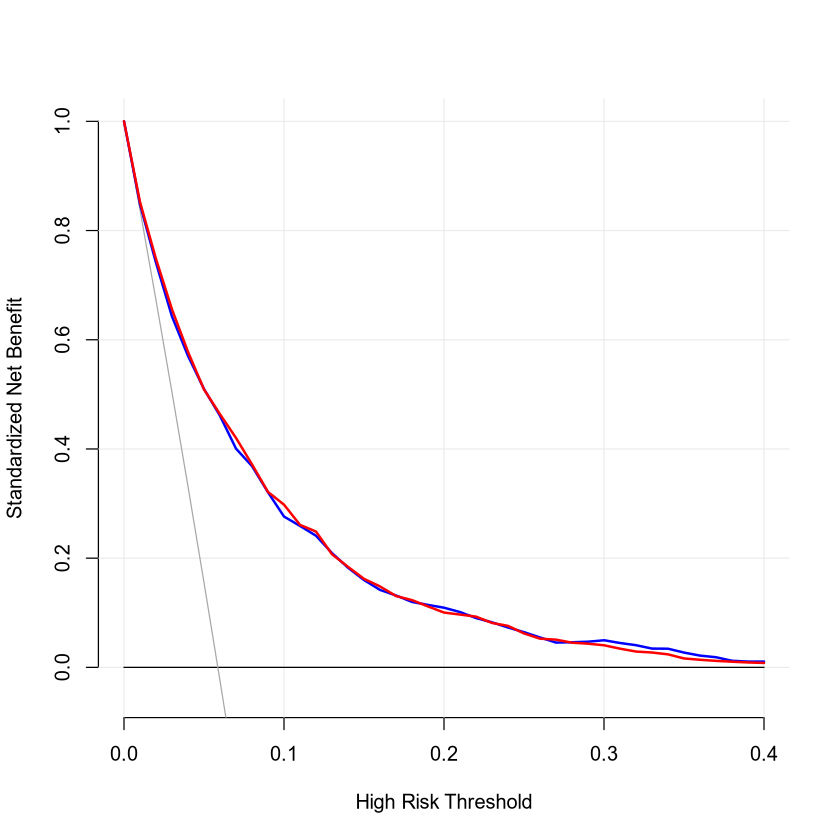

In [73]:
plot_decision_curve( list(baseline.model, full.model),  curve.names = c("Baseline model", "Full model"),  col = c("blue", "red"),
 
confidence.intervals = FALSE,  #remove confidence intervals
 
cost.benefit.axis = FALSE, #remove cost benefit axis
 
legend.position = "none") #remove the legend

In [52]:
library(rmda)

In [56]:
data(dcaData)

baseline.model <- decision_curve(Cancer~Age + Female + Smokes,   data = dcaData, thresholds = seq(0, .4, by = .01), study.design = 'cohort',  bootstraps = 10)
 
full.model <- decision_curve(Cancer~Age + Female + Smokes + Marker1 + Marker2, data = dcaData,thresholds = seq(0, .4, by = .01), bootstraps = 10)

Note:  The data provided is used to both fit a prediction model and to estimate the respective decision curve. This may cause bias in decision curve estimates leading to over-confidence in model performance. 



Note:  The data provided is used to both fit a prediction model and to estimate the respective decision curve. This may cause bias in decision curve estimates leading to over-confidence in model performance. 



Note: When multiple decision curves are plotted, decision curves for 'All' are calculated using the prevalence from the first DecisionCurve object in the list provided.



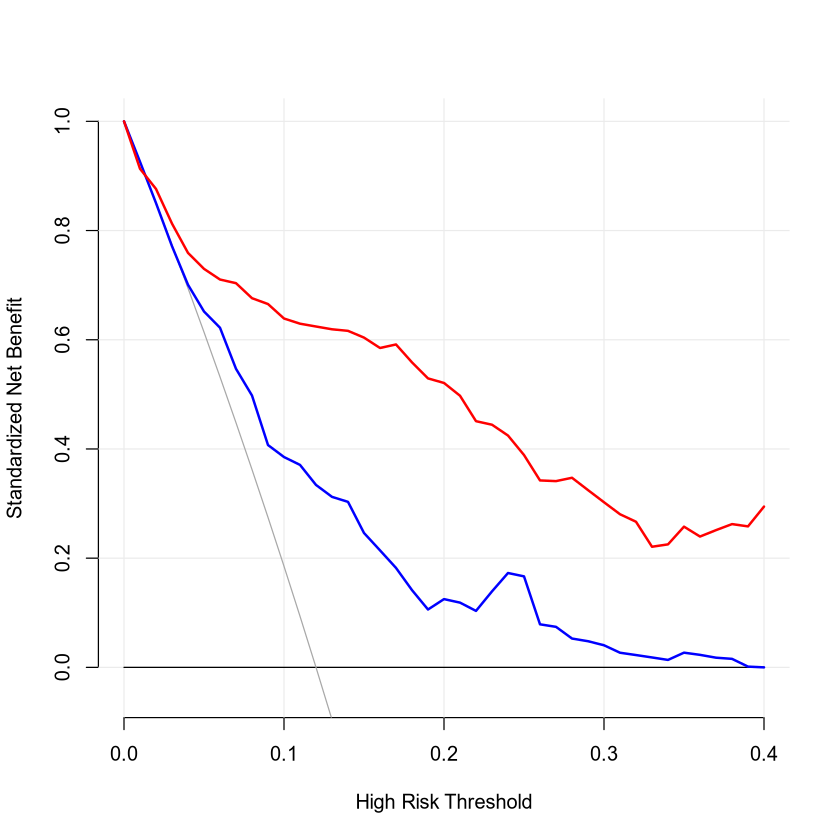

In [59]:
plot_decision_curve( list(baseline.model, full.model),  curve.names = c("Baseline model", "Full model"),  col = c("blue", "red"),
 
confidence.intervals = FALSE,  #remove confidence intervals
 
cost.benefit.axis = FALSE, #remove cost benefit axis
 
legend.position = "none") #remove the legend

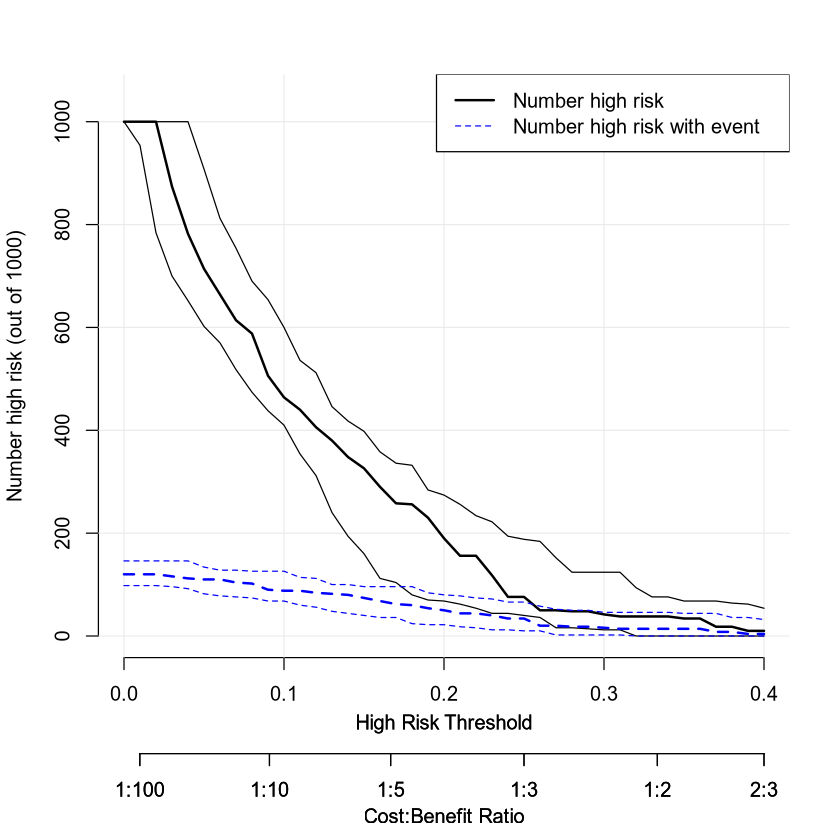

In [60]:
plot_clinical_impact(baseline.model, xlim = c(0, .4),  col = c("black", "blue"))
